# Getting Indian Stock Prices Using Python

In [7]:
!pip install jugaad-data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 321.4 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.8/115.8 kB 527.3 kB/s eta 0:00:001m965.2 kB/s eta 0:00:01
  Attempting uninstall: click
    Found existing installation: click 8.1.7
    Uninstalling click-8.1.7:
      Successfully uninstalled click-8.1.7
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.12.2
    Uninstalling beautifulsoup4-4.12.2:
      Successfully uninstalled beautifulsoup4-4.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.35 requires beautifulsoup4>=4.11.1, but you have beautifulsoup4 4.9.3 which is incompatible.


In [8]:
import datetime
import pandas as pd
from dateutil.relativedelta import relativedelta
from jugaad_data.nse import index_raw

# Get from and to dates
to_date = datetime.date.today()
from_date = to_date - relativedelta(years=3)
print(from_date, to_date)

# Fetch the index data 
raw_index_data = index_raw(symbol="NIFTY 50", 
                           from_date=from_date, 
                           to_date=to_date)

2021-01-21 2024-01-21


# Convert the raw data into a dataframe

In [9]:
def convert_to_date(date_str):
    date_obj = datetime.datetime.strptime(date_str, '%d %b %Y')
    return date_obj

nifty_index_historical_df = pd.DataFrame(raw_index_data)
nifty_index_historical_df['HistoricalDate'] = nifty_index_historical_df['HistoricalDate'].apply(convert_to_date)
nifty_index_historical_df = nifty_index_historical_df.sort_values('HistoricalDate').reset_index(drop=True)
nifty_index_historical_df

,Index Name,INDEX_NAME,HistoricalDate,OPEN,HIGH,LOW,CLOSE
0,Nifty 50,NIFTY 50,2021-01-21,14730.95,14753.55,14517.25,14590.35
1,Nifty 50,NIFTY 50,2021-01-22,14583.4,14619.9,14357.75,14371.90
2,Nifty 50,NIFTY 50,2021-01-25,14477.8,14491.1,14218.6,14238.90
3,Nifty 50,NIFTY 50,2021-01-27,14237.95,14237.95,13929.3,13967.50
4,Nifty 50,NIFTY 50,2021-01-28,13810.4,13898.25,13713.25,13817.55
...,...,...,...,...,...,...,...
739,Nifty 50,Nifty 50,2024-01-16,22080.5,22124.15,21969.8,22032.30
740,Nifty 50,Nifty 50,2024-01-17,21647.25,21851.5,21550.45,21571.95
741,Nifty 50,Nifty 50,2024-01-18,21414.2,21539.4,21285.55,21462.25
742,Nifty 50,Nifty 50,2024-01-19,21615.2,21670.6,21575,21622.40


## Data processing: Removing duplicates and filtering records

In [10]:
nifty_index_historical_df = nifty_index_historical_df.drop_duplicates()
nifty_index_historical_df = nifty_index_historical_df.loc[nifty_index_historical_df.loc[:, 'Index Name'] == 'Nifty 50']
nifty_index_historical_df

,Index Name,INDEX_NAME,HistoricalDate,OPEN,HIGH,LOW,CLOSE
0,Nifty 50,NIFTY 50,2021-01-21,14730.95,14753.55,14517.25,14590.35
1,Nifty 50,NIFTY 50,2021-01-22,14583.4,14619.9,14357.75,14371.90
2,Nifty 50,NIFTY 50,2021-01-25,14477.8,14491.1,14218.6,14238.90
3,Nifty 50,NIFTY 50,2021-01-27,14237.95,14237.95,13929.3,13967.50
4,Nifty 50,NIFTY 50,2021-01-28,13810.4,13898.25,13713.25,13817.55
...,...,...,...,...,...,...,...
739,Nifty 50,Nifty 50,2024-01-16,22080.5,22124.15,21969.8,22032.30
740,Nifty 50,Nifty 50,2024-01-17,21647.25,21851.5,21550.45,21571.95
741,Nifty 50,Nifty 50,2024-01-18,21414.2,21539.4,21285.55,21462.25
742,Nifty 50,Nifty 50,2024-01-19,21615.2,21670.6,21575,21622.40


## Stitching it all together

In [12]:
import datetime
import pandas as pd
from dateutil.relativedelta import relativedelta
from jugaad_data.nse import index_raw

n_years = 3 # Parameter for historical years

def convert_to_date(date_str):
    date_obj = datetime.datetime.strptime(date_str, '%d %b %Y')
    return date_obj

# Get from and to dates
to_date = datetime.date.today()
from_date = to_date - relativedelta(years=n_years)
print(from_date, to_date)

# Fetch the index data 
raw_index_data = index_raw(symbol="NIFTY 50", from_date=from_date, to_date=to_date)

# Converting into dataframe and processing the data
nifty_historical_df = (pd.DataFrame(raw_index_data)\
                            .assign(HistoricalDate=lambda x: x['HistoricalDate'].apply(convert_to_date))\
                            .sort_values('HistoricalDate')\
                            .drop_duplicates()\
                            .loc[lambda x: x['Index Name'] == 'Nifty 50']\
                            .reset_index(drop=True))
nifty_historical_df

2021-01-21 2024-01-21


,Index Name,INDEX_NAME,HistoricalDate,OPEN,HIGH,LOW,CLOSE
0,Nifty 50,NIFTY 50,2021-01-21,14730.95,14753.55,14517.25,14590.35
1,Nifty 50,NIFTY 50,2021-01-22,14583.4,14619.9,14357.75,14371.90
2,Nifty 50,NIFTY 50,2021-01-25,14477.8,14491.1,14218.6,14238.90
3,Nifty 50,NIFTY 50,2021-01-27,14237.95,14237.95,13929.3,13967.50
4,Nifty 50,NIFTY 50,2021-01-28,13810.4,13898.25,13713.25,13817.55
...,...,...,...,...,...,...,...
739,Nifty 50,Nifty 50,2024-01-16,22080.5,22124.15,21969.8,22032.30
740,Nifty 50,Nifty 50,2024-01-17,21647.25,21851.5,21550.45,21571.95
741,Nifty 50,Nifty 50,2024-01-18,21414.2,21539.4,21285.55,21462.25
742,Nifty 50,Nifty 50,2024-01-19,21615.2,21670.6,21575,21622.40


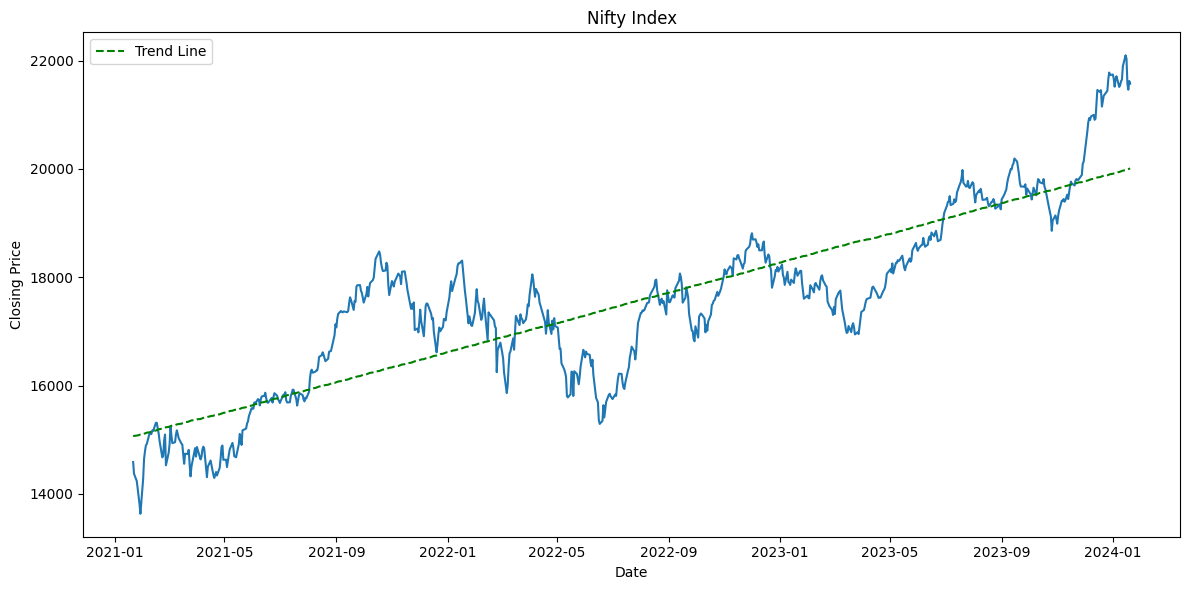

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(12, 6))

nifty_historical_df['CLOSE'] = nifty_historical_df['CLOSE'].astype('float')

# Plot the historical Nifty data
plt.plot(nifty_historical_df['HistoricalDate'].values, nifty_historical_df['CLOSE'].values)

# Calculate and plot the trend line
x_values = np.arange(len(nifty_historical_df)).reshape(-1, 1)
y_values = nifty_historical_df['CLOSE'].values.reshape(-1, 1)
regressor = LinearRegression().fit(x_values, y_values)
trend_line = regressor.predict(x_values)
plt.plot(nifty_historical_df['HistoricalDate'].values, trend_line, linestyle='--', color='g', label='Trend Line')

# Set the title and labels
plt.title('Nifty Index')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### Historical Data

In [16]:
import yfinance as yf

# end date data is excluded 
stock_data = yf.download('TATAMOTORS.NS', start='2023-01-01', end='2023-01-06')
stock_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,392.500000,396.000000,391.0,394.799988,393.573334,10501357
2023-01-03,396.000000,398.350006,393.0,393.899994,392.676147,9431220
2023-01-04,394.799988,394.799988,385.0,385.600006,384.401947,16121049
2023-01-05,387.899994,388.750000,382.5,386.899994,385.697906,10443908


In [17]:
from jugaad_data.nse import NSELive
n = NSELive()
tata_motors_price, mon100_etf = n.stock_quote('TATAMOTORS')['priceInfo']['lastPrice'], \
                          n.stock_quote('MON100')['priceInfo']['lastPrice']

print(tata_motors_price, mon100_etf)

819.95 138.52


In [18]:
from jugaad_data.nse import stock_df
tata_motors_stock_df = stock_df(symbol='TATAMOTORS', 
                                from_date=date(2023,1,1), 
                                to_date=date(2023,1,5), 
                                series="EQ")
tata_motors_stock_df

NameError: name 'date' is not defined